In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb

In [98]:
dur = 6
thresh = 3

In [101]:
## load data
#path = '~/Documents/data/CBGdata/xgboost_ready/duration_7_threshold_3_single_day.csv'
path = '~/Documents/data/CBGdata/xgboost_ready/duration_' + str(dur) + '_threshold_' + str(thresh) + 'xx.csv'

dt = pd.read_csv(path, index_col = False)

In [90]:
# load model
model_xgb_2 = xgb.Booster()
model_xgb_2.load_model('~/Documents/code/cbg_code/unipoc_xgb_models/duration_' + str(dur) + '_threshold_' + str(thresh) + '_ratio_all_final_model.model')

In [91]:
X = dt.drop(['label', 'id'], axis=1)
y = dt['label']

# use the loaded XGBoost model
model = model_xgb_2

In [92]:
# run saved model
y_pred_proba = model.predict(xgb.DMatrix(X))

y_true = y

In [93]:
print(y_pred_proba)

[0.29879662 0.10004889 0.14163986 0.09416501 0.43757635 0.06883766
 0.17591564 0.28434286 0.1288296  0.14073366 0.16603665 0.12168193
 0.15501308 0.85954386 0.27543873 0.5860085  0.59283704 0.71742857
 0.16938812 0.22937548 0.43760994 0.8899209  0.17603485 0.40877143
 0.1509725  0.1416613  0.30115733 0.11568719 0.27814534 0.2534451
 0.32661313 0.33896    0.34808546 0.33870545 0.31364962 0.07248259
 0.4504379  0.08953238 0.46254566 0.7952623  0.18832175 0.24264497
 0.3552058  0.0814614  0.14507161 0.31060427 0.71717256 0.08198742
 0.11497252 0.10849851 0.1545294  0.7194269  0.56163347 0.09330124
 0.1522266  0.74641055 0.11938761 0.24122578 0.08686027 0.6247544
 0.8955801  0.8627661  0.08970378 0.6528499  0.30143496 0.751786
 0.28217718 0.424657   0.31120232 0.26133043 0.166704   0.29513952
 0.09271808 0.08482442 0.6696003  0.09727328 0.09663592 0.26726282
 0.6323447  0.1216955  0.8255319  0.26256207 0.12225752 0.08347183
 0.27092105 0.0427209  0.8648335  0.50819576 0.21877488 0.31258488

In [94]:
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
943    0
944    0
945    0
946    0
947    1
Name: label, Length: 948, dtype: int64


In [95]:
# Calculate the AUROC
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(y_true, y_pred_proba)
print(auroc)

0.8176010816476896


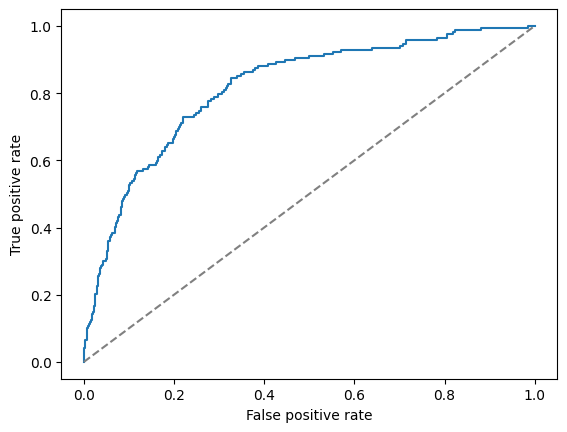

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

def plot_roc_curve(y_true, y_pred_proba):
    # Calculate the false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    
plot_roc_curve(y_true, y_pred_proba)

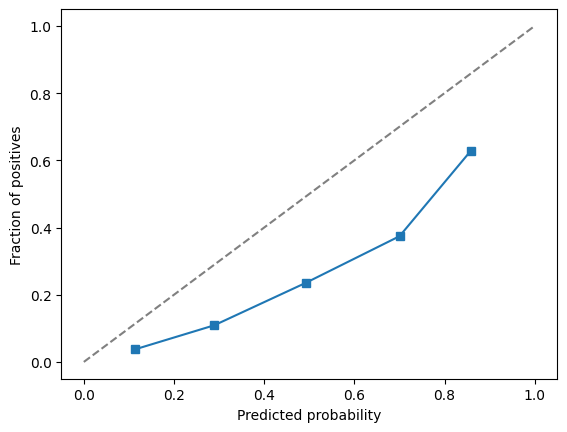

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.calibration import calibration_curve
from sklearn.model_selection import KFold

def plot_calibration_curve(y_true, y_pred_proba):
    # Calculate the fraction of positive examples
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, y_pred_proba, n_bins=5)

    # Plot the calibration curve
    plt.plot(mean_predicted_value, fraction_of_positives, 's-')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel('Predicted probability')
    plt.ylabel('Fraction of positives')

# Example usage
#dt = pd.read_csv('data.csv')
#best_params = optimize_xgboost(dt)
#model, scores, df_results, auroc = train_xgboost(dt, best_params)
plot_calibration_curve(y_true, y_pred_proba)